# Displacement due to a square-shaped load

We want to evaluate the displacement due to an
arbitrary distribution of force density.


$$G_{ij} = \frac{1}{8\pi\mu (1 - \nu)}\left[-(3 - 4\nu)\delta_{ij}\ln(r)
     + \frac{r_i r_j}{r^2}\right]\, .$$
   
   
The stress components are given by

$$F(\mathbf{r}, \boldsymbol{\zeta})
   = -\frac{\hat{\mathbf{r}}}{2\pi |\mathbf{r} - \boldsymbol{\zeta}|} \, ,$$
   
with $\hat{\mathbf{r}}$ a unit vector from $\mathbf{r}$ to
$\boldsymbol{\zeta}$.


We can compute the potential/field given by a distribution of
mass density $\rho(\mathbf{x})$ adding up the individual
point contributions, that is, with an integral.

$$\phi(\boldsymbol{\zeta})
= \int\limits_\Omega G(\mathbf{x}, \boldsymbol{\zeta})
  \rho(\mathbf{x})\, \mathrm{d}\Omega(\mathbf{x})$$
  
If we consider that the domain is triangulated we can express the integral as

$$\phi(\boldsymbol{\zeta})
= \sum_{e}\int\limits_{\Omega_e} G(\mathbf{x}, \boldsymbol{\zeta})
  \rho(\mathbf{x})\, \mathrm{d}\Omega(\mathbf{x})\, .$$
  
Let's consider that the variation of $\rho$ and $G$ is negligible over
each triagle. Thus, we obtain

\begin{align}
\phi(\boldsymbol{\zeta})
&\approx \sum_{e} G(\mathbf{x}_m, \boldsymbol{\zeta}) \rho(\mathbf{x}_m) \int\limits_{\Omega_e}\mathrm{d}\Omega(\mathbf{x})\\
&= \sum_{e} G(\mathbf{x}_m, \boldsymbol{\zeta}) \rho(\mathbf{x}_m) V_e\, ,
\end{align}

where $\mathbf{x}_m$ refers to the centroid of each triangle.

If we consider that the density is the same over the domain, we get

$$\phi(\boldsymbol{\zeta})
\approx \rho \sum_{e} G(\mathbf{x}_m, \boldsymbol{\zeta}) V_e\, .$$

In [7]:
%matplotlib notebook

In [8]:
import numpy as np
from numpy import log, arctan2, pi, mean
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import meshio

In [9]:
mesh = meshio.read("files/square_planet2.msh")
pts = mesh.points
tris_planet = mesh.cells[0].data
tris = np.vstack([cells.data for cells in mesh.cells])
x, y, _ = pts.T

<IPython.core.display.Javascript object>


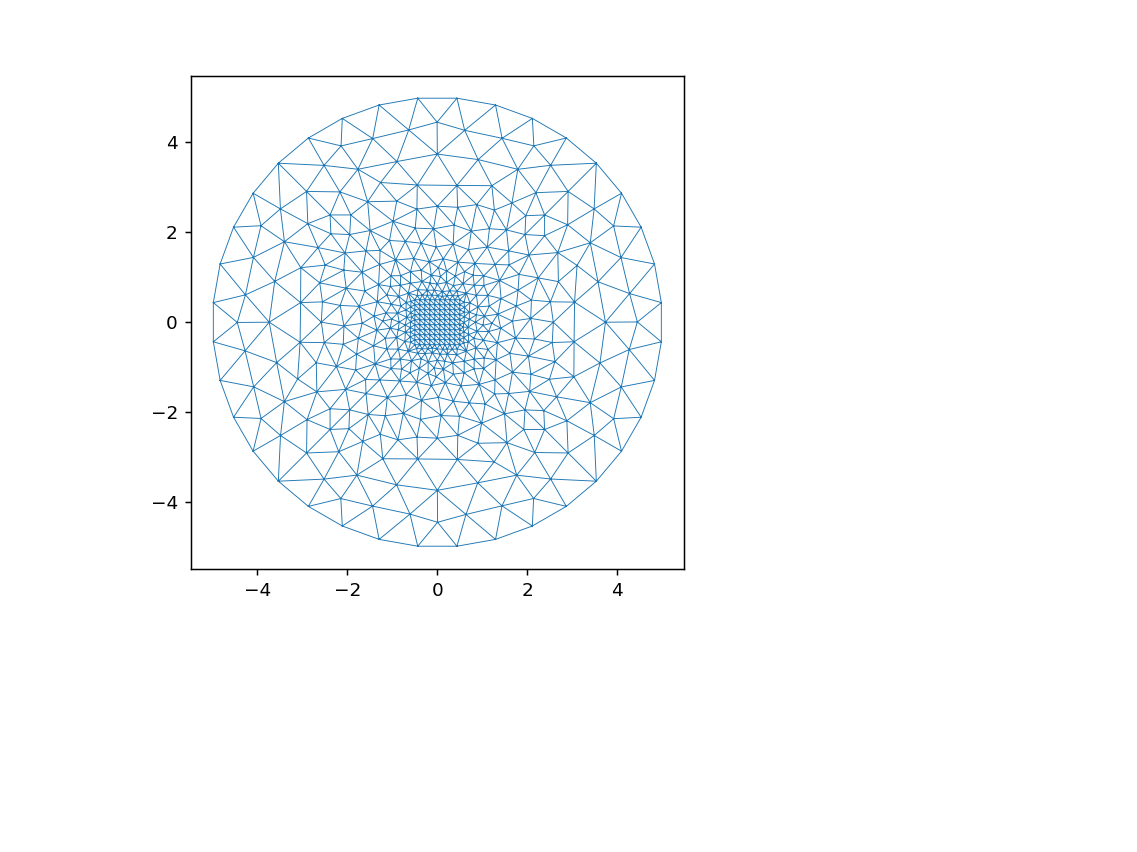

In [10]:
plt.figure()
plt.triplot(x, y, tris, lw=0.5)
plt.axis("image");

In [11]:
def green_disp_2d(r_vec, mu, nu):
    """Green function for Laplace equation
    
    Parameters
    ----------
    r_vec : float
        Vector between the two points

    Returns
    -------
    G : ndarray, float
        Values of the Green_function
    """
    r_vec.shape = 2, 1
    r = np.linalg.norm(r_vec, axis=0)
    G = -(3 - 4*nu)*np.eye(2)*np.log(r) + r_vec @ r_vec.T/r**2
    return G/(8*np.pi*(1 - nu))

In [12]:
G_vec = np.zeros((2, 2, x.shape[0]))
for cont, pt in enumerate(pts):
    pt_x, pt_y, _ = pt
    G_vec[:, :, cont] = green_disp_2d(np.array([pt_x, pt_y]), 1, 0.25)

<IPython.core.display.Javascript object>


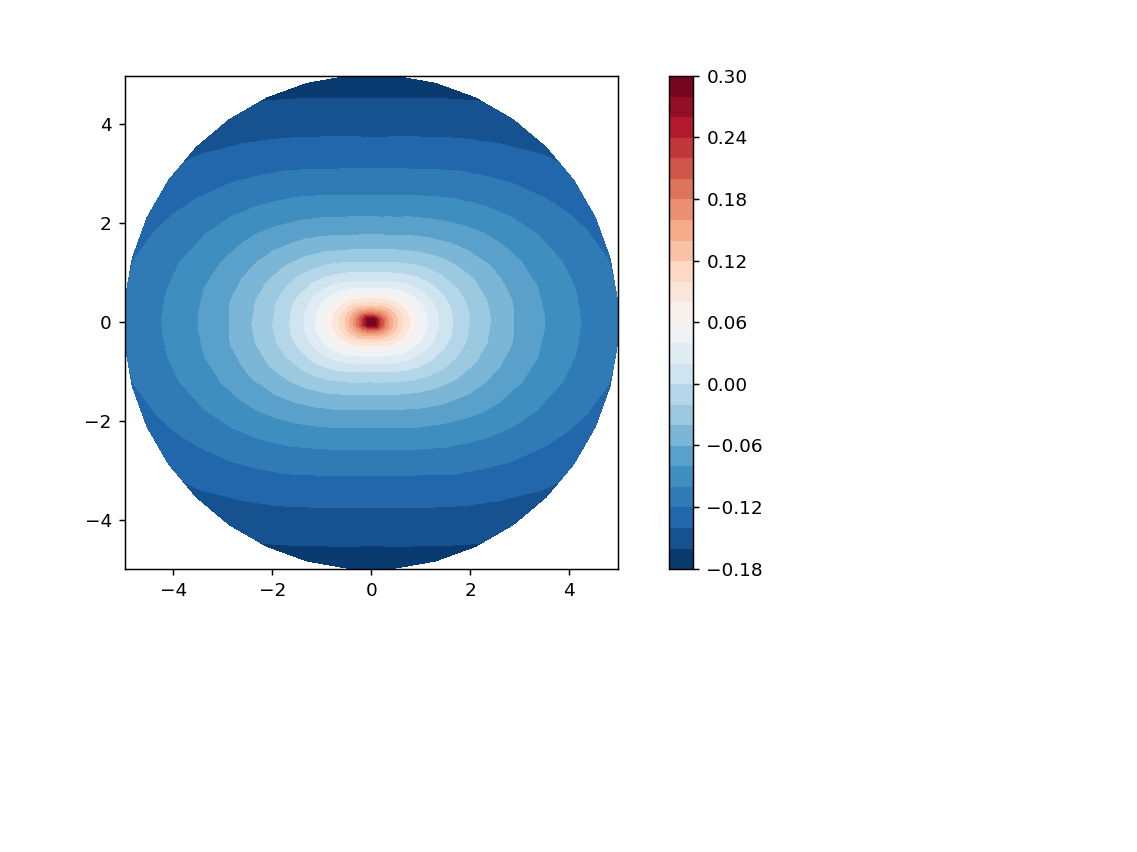

In [13]:
plt.figure()
plt.tricontourf(x, y, tris, G_vec[0, 0, :], 24, cmap="RdBu_r")
plt.colorbar()
plt.axis("image");

<IPython.core.display.Javascript object>


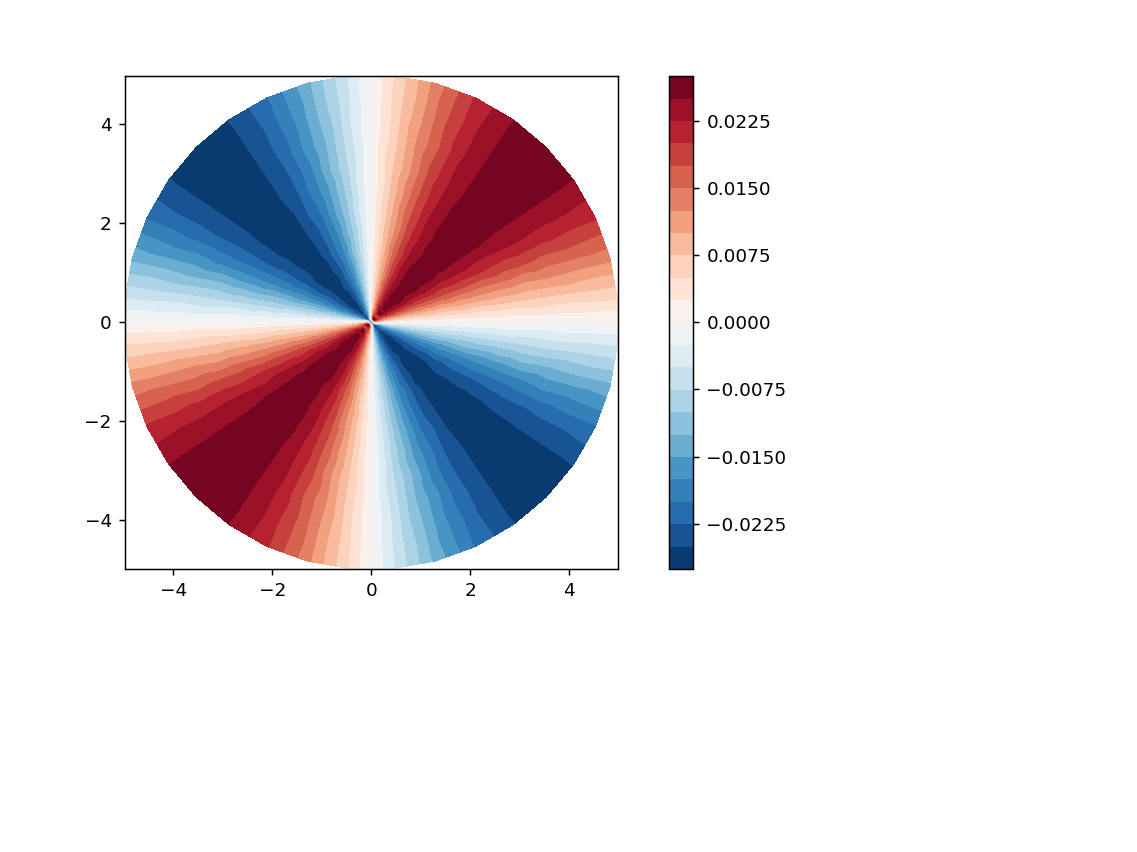

In [14]:
plt.figure()
plt.tricontourf(x, y, tris, G_vec[0, 1, :], 24, cmap="RdBu_r")
plt.colorbar()
plt.axis("image");

<IPython.core.display.Javascript object>


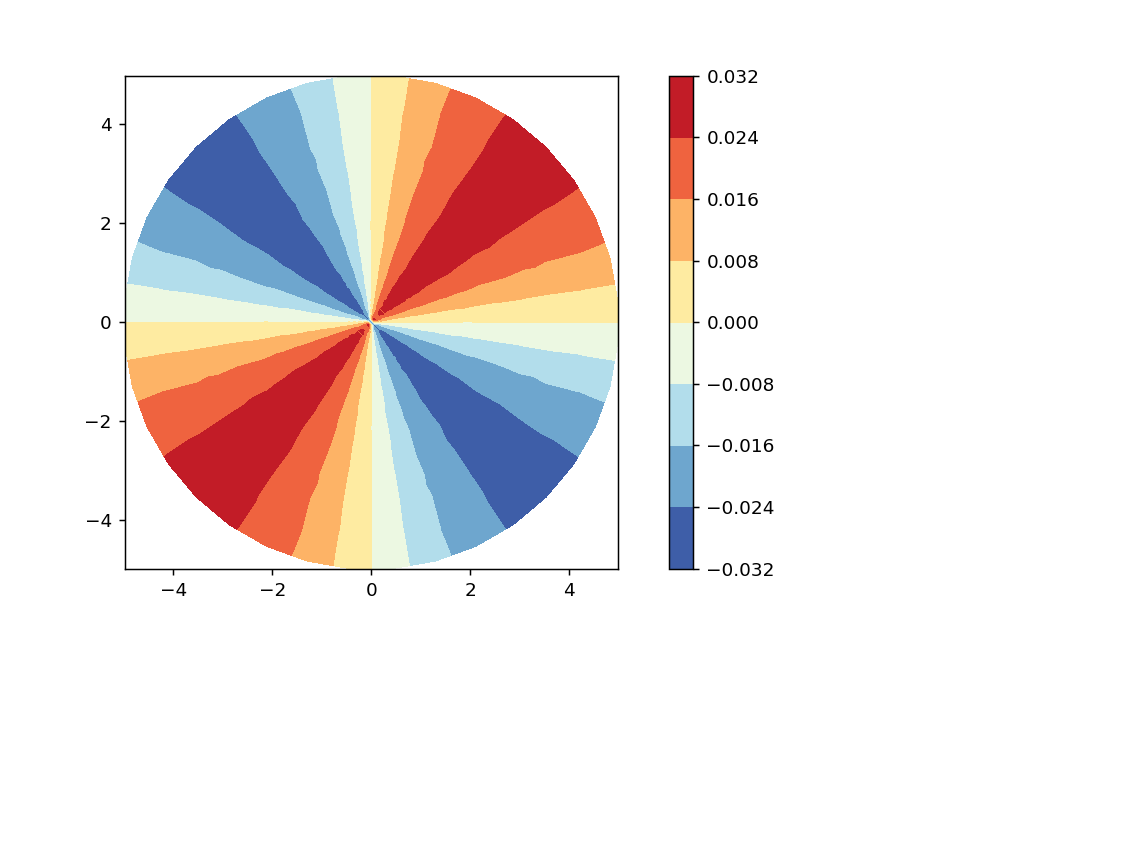

In [9]:
plt.figure()
plt.tricontourf(x, y, tris, G_vec[1, 0, :], cmap="RdYBu_r")
plt.colorbar()
plt.axis("image");

<IPython.core.display.Javascript object>


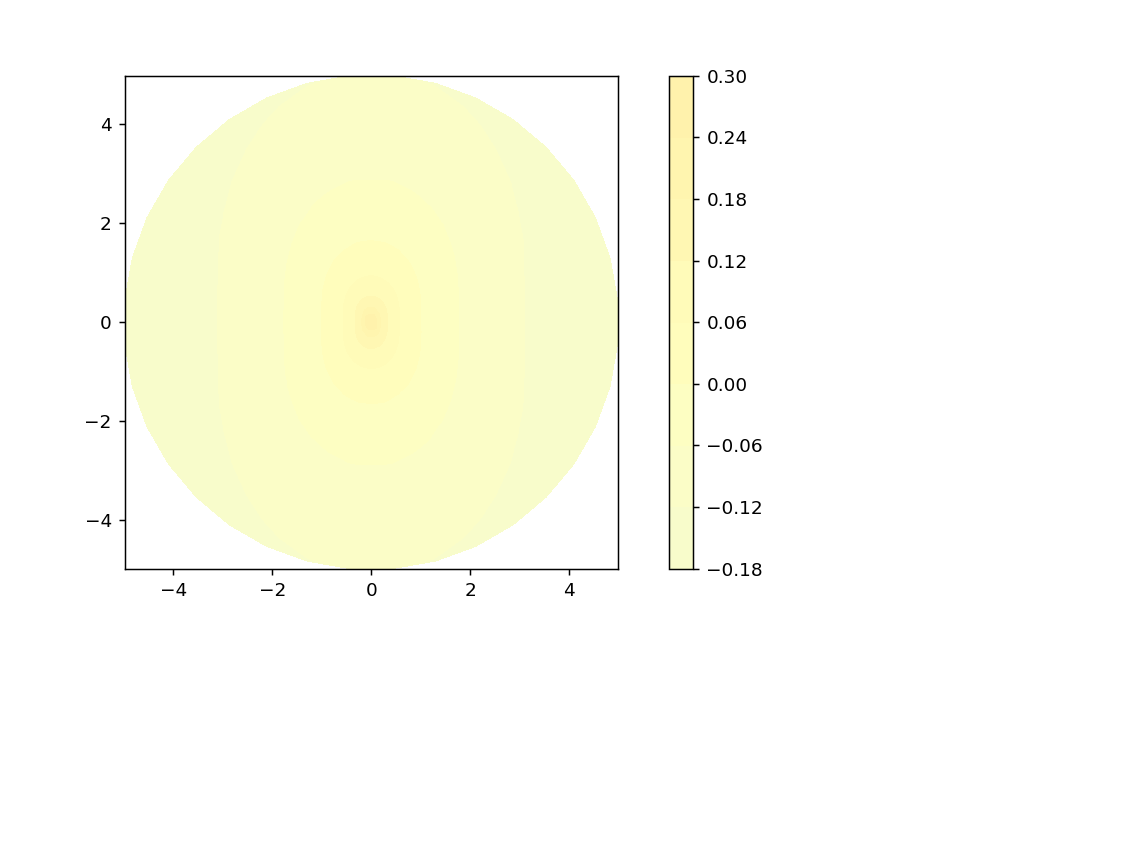

In [10]:
plt.figure()
plt.tricontourf(x, y, tris, G_vec[1, 1, :], cmap="RdYlBu_r",
               vmin=-3.2, vmax=3.2)
plt.colorbar()
plt.axis("image");

In [11]:
def area_tri(coords):
    """Compute the area of a triangle with given coordinates

    Parameters
    ----------
    coords : ndarray, float
        Coordinates for the nodes of the triangle.

    Returns
    -------
    area : float
        Area of the triangle
    """
    mat = coords.copy()
    mat[:, 2] = 1
    return 0.5 * np.abs(np.linalg.det(mat))

In [12]:
disp = np.zeros_like(pts[:, :2])

In [13]:
for tri in tris_planet:
    coords = pts[tri]
    area = area_tri(coords)
    xm, ym, _ = np.mean(coords, axis=0)
    for cont, pt in enumerate(pts):
        pt_x, pt_y, _ = pt
        r_vec = np.array([pt_x - xm, pt_y - ym])
        G = green_disp_2d(r_vec, 1.0, 0.25)
        disp[cont, :] += area * G @ np.array([1, 0])        

<IPython.core.display.Javascript object>


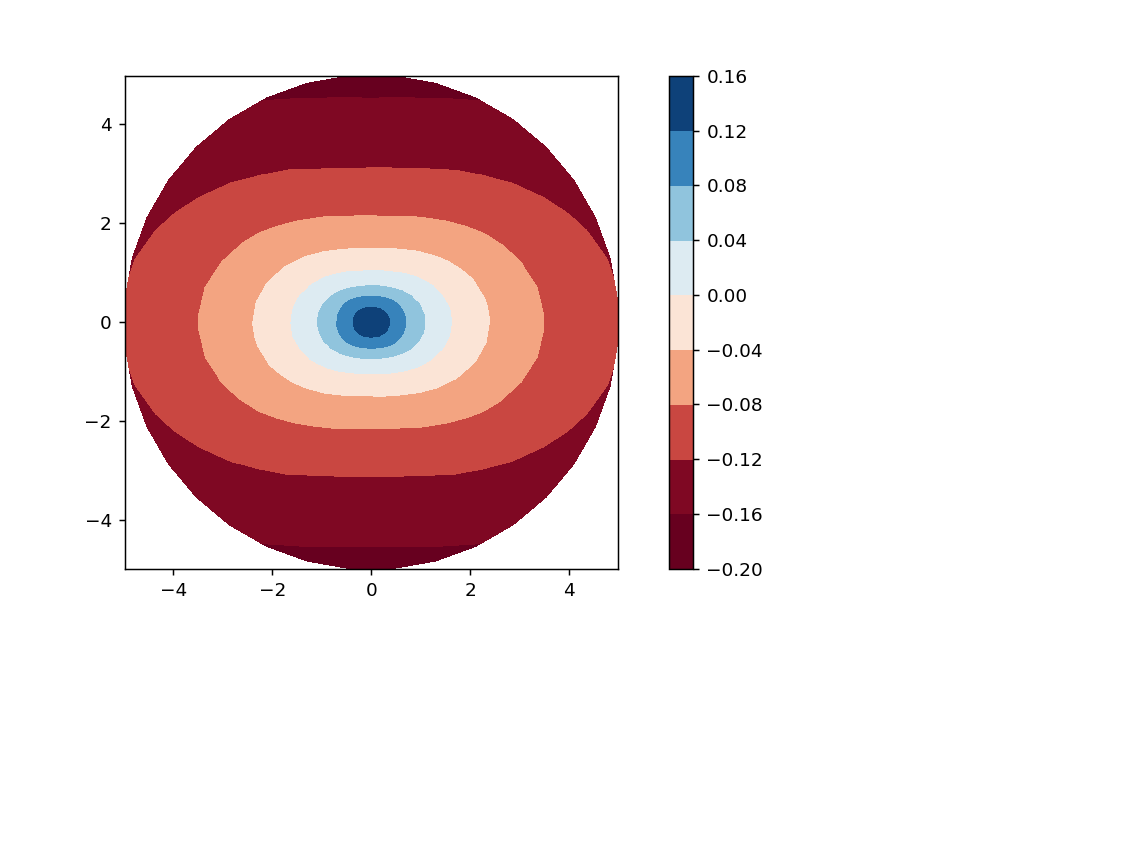

In [19]:
plt.figure()
plt.tricontourf(x, y, tris, disp[:, 0],
                cmap="RdBu", vmin=-0.15, vmax=0.15)
plt.colorbar()
plt.axis("image");

<IPython.core.display.Javascript object>


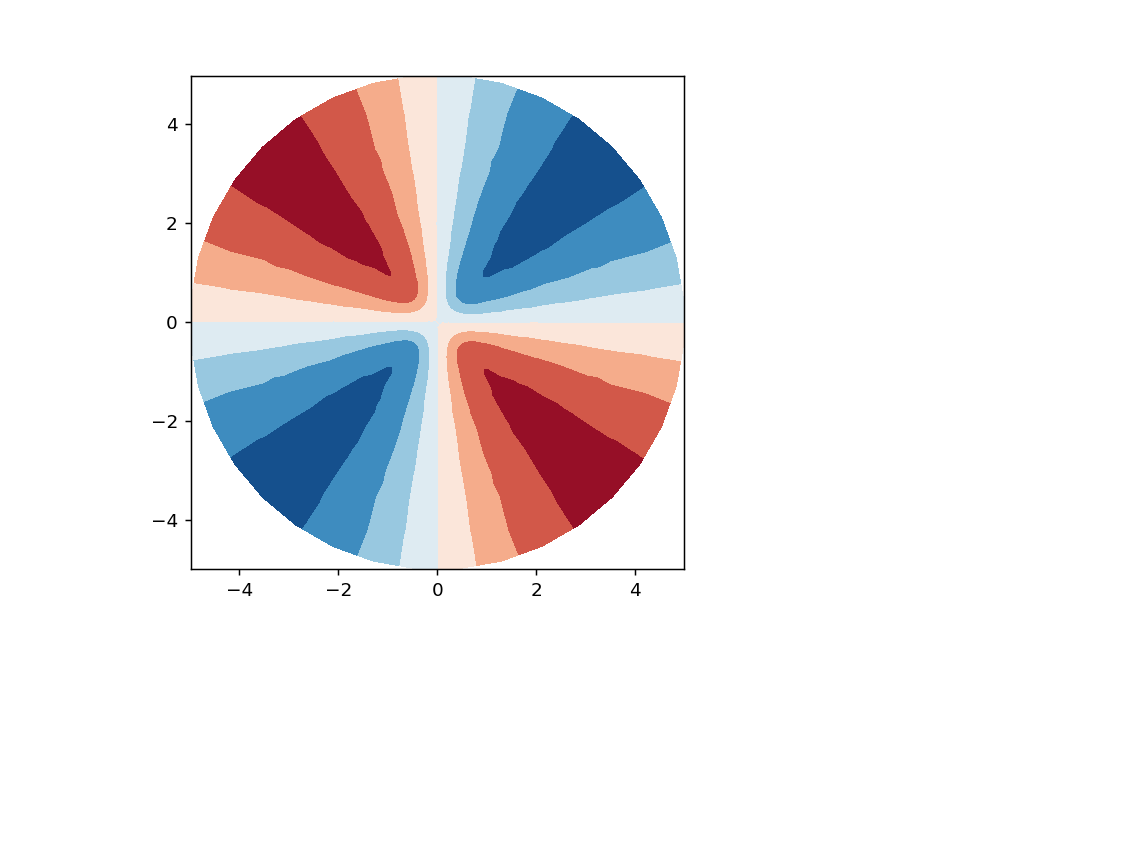

In [15]:
plt.figure()
plt.tricontourf(x, y, tris, disp[:, 1],
                cmap="RdBu")
plt.axis("image");

<IPython.core.display.Javascript object>


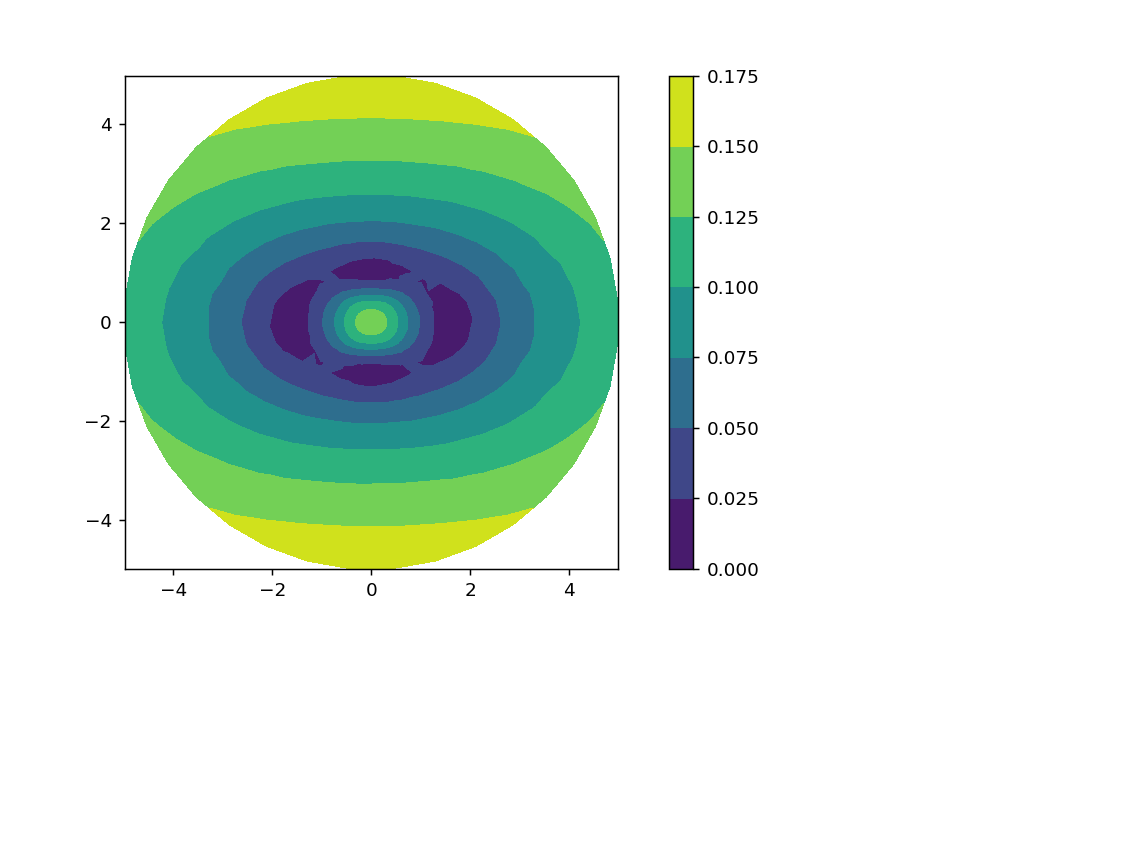

In [20]:
plt.figure()
plt.tricontourf(x, y, tris, np.linalg.norm(disp, axis=1))
plt.colorbar()
plt.axis("image");

In [17]:
#mesh.point_data["displacement"] = disp

In [18]:
#mesh.write("files/square_elast.vtk")